# Установка и импорт необходимых моуделй



In [1]:
!pip install catboost
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 928.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 27.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=702ea3c07044c6ae4eaf727b3e6dd394a12eb7485e6c80e1623f347a92b278cd
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [2]:
# при работе через Google Colab
# прописать путь до всех файлов py
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Учёба/8 семестр/диплом/Проект/VKR/Блокноты')

Mounted at /content/drive


In [3]:
import AnalysisFunc
import BaseFuncs
import PredictionSplit
import PredictionResults

ДЛЯ ПРОГНОЗИРОВАНИЙ ДОСТУПНЫ СЛЕДУЮЩИЕ ПОДСЧЕТЫ ОШИБОК/ТОЧНОСТЕЙ:
recall
f1
r2
mae


In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

from itertools import chain

# Загрузка данных прошлого года и нынешнего
Для прошлого года создаются датафреймы с очищенными выбросами по Q и Z

In [26]:
data = BaseFuncs.GetDataFrameListFromFileConverted("/content/drive/My Drive/Учёба/8 семестр/диплом/Проект/VKR/Учет контрольных/Преобразованные/ПиОА 1 div20kr.csv")
data = AnalysisFunc.MakeFloat(data, ["Пол"])
data_Q = AnalysisFunc.DeleteByQuantile(data, 0.15)
data_Z = AnalysisFunc.DeleteByZ(data)
data_dict = {"Original": data} #, "Квартиль": data_Q, "По Z": data_Z}
data.head(5)

,Пол,Не сдал(-а),Посещение до Контрольная работа 1,Баллы до Контрольная работа 1,Количество баллов до Контрольная работа 1,Процент баллов до Контрольная работа 1,Контрольная работа 1,Посещение до Контрольная работа 2,Баллы до Контрольная работа 2,Количество баллов до Контрольная работа 2,Процент баллов до Контрольная работа 2,Контрольная работа 2,Посещение до Контрольная работа 3,Баллы до Контрольная работа 3,Количество баллов до Контрольная работа 3,Процент баллов до Контрольная работа 3,Контрольная работа 3
0,1.0,0,0.93,0.160,8.0,0.52,0.600,1.0,0.060,3.0,0.26,0.6000,0.43,0.10,5.0,0.43,0.600
1,1.0,1,1.00,0.035,3.0,0.11,0.369,1.0,0.012,2.0,0.05,0.2245,1.00,0.00,0.0,0.00,0.375
2,1.0,1,0.00,0.000,0.0,0.00,0.000,0.0,0.000,0.0,0.00,0.0000,0.00,0.00,0.0,0.00,0.000
3,0.0,0,1.00,0.150,8.0,0.48,0.585,1.0,0.060,3.0,0.26,0.5900,1.00,0.08,4.0,0.35,0.775
4,0.0,0,0.86,0.160,8.0,0.52,0.224,0.5,0.060,3.0,0.26,0.5040,1.00,0.08,4.0,0.35,0.750


In [25]:
dataReal = BaseFuncs.GetDataFrameListFromFileConverted("/content/drive/My Drive/Учёба/8 семестр/диплом/Проект/VKR/Учет контрольных/Преобразованные/ПиОА тест div20kr.csv")
dataReal = AnalysisFunc.MakeFloat(dataReal, ["Пол"])
dataReal.head(5)

,Направление,Пол,Не сдал(-а),Посещение до Контрольная работа 1,Баллы до Контрольная работа 1,Количество баллов до Контрольная работа 1,Процент баллов до Контрольная работа 1,Контрольная работа 1,Посещение до Контрольная работа 2,Баллы до Контрольная работа 2,Количество баллов до Контрольная работа 2,Процент баллов до Контрольная работа 2,Контрольная работа 2,Посещение до Контрольная работа 3,Баллы до Контрольная работа 3,Количество баллов до Контрольная работа 3,Процент баллов до Контрольная работа 3,Контрольная работа 3
0,2,1.0,1,0.3,0.048,3.0,0.30,0.050,0.2,0.025,2.0,0.12,0.000,0.25,0.093,5.0,0.26,0.000
1,21,0.0,0,0.7,0.160,8.0,1.00,0.455,0.8,0.090,4.0,0.43,0.652,0.75,0.100,4.0,0.28,0.550
2,12,1.0,1,1.0,0.000,0.0,0.00,0.150,0.8,0.000,0.0,0.00,0.000,0.12,0.000,0.0,0.00,0.000
3,11,1.0,1,0.9,0.020,2.0,0.12,0.095,1.0,0.085,3.0,0.40,0.085,1.00,0.020,2.0,0.06,0.285
4,12,1.0,1,0.5,0.020,1.0,0.12,0.190,0.2,0.000,0.0,0.00,0.000,0.12,0.000,0.0,0.00,0.000


# Словари моделей прогнозирования

In [7]:
models = {  "k-ближайших соседей": KNeighborsClassifier(leaf_size=20, metric='minkowski', n_neighbors=12, p=2, weights='uniform'),
            "Рандомный лес": RandomForestClassifier(max_depth=15, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100),
            "Дерево решений": DecisionTreeClassifier(max_depth=9, random_state=0),
            "CatBoost": CatBoostClassifier(iterations=31, learning_rate=0.1, silent=True, allow_writing_files=False),
            "AdaBoostClassifier": AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=2.0, n_estimators=48)}
models_regres = { "k-ближайших соседей": KNeighborsRegressor(leaf_size=34, metric='minkowski', n_neighbors= 15, p=1, weights='uniform'),
            "Рандомный лес": RandomForestRegressor(bootstrap=True, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=14),
            "CatBoostRegressor": CatBoostRegressor(iterations=61, learning_rate=0.1, depth=2, silent=True, allow_writing_files=False),
            "AdaBoostRegressor": AdaBoostRegressor(learning_rate=0.1, loss='linear', n_estimators=8), #), \
            "Ridge": Ridge(),  \
            "LinearRegression": LinearRegression()}

# ИНФО

**Разделение датафреймов на X и Y** происходит через функции:

`PredictionSplit.SplitTestTrainPass(data, exam, not_for_prediction)` (Y - отметки о сдаче)

`PredictionSplit.SplitTestTrainTest(data, exam, not_for_prediction)` (Y - отметки о баллах контрольной)

где `not_for_prediction` - список параметров, которые не должны выходить в выборку X

**Прогнозирование** производится через функции:


---

**Получение словаря с ошибками/точностями**, где ключи - названия моделей из словаря `models`
`PredictionResults.PredictionModel(X, Y, models, test_size, accuracy_type)`

и

`PredictionResults.PredictionModelNew(X, Y, x_, y_, models, accuracy_type)`


---


**Получение словаря с матрицами ошибок**, где ключи - названия моделей из словаря `models`
`PredictionResults.PredictionModelMatrix(X, Y, models, test_size)`

и

`PredictionResults.PredictionModelMatrixNew(X, Y, x_, y_, models)`


---


`accuracy_type` берется из словаря:


```
accuracy_dict = {
    "recall": recall_score,
    "f1": f1_score,
    "r2": r2_score,
    "mae": mean_absolute_error
}
```



# Прогнозирование train_split
Данные прошлого года делятся на тренировочную и тестовую выборку (проверка для оригинальных данных, так и для очищенных)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       210
           1       0.85      0.87      0.86        79

    accuracy                           0.92       289
   macro avg       0.90      0.91      0.90       289
weighted avg       0.92      0.92      0.92       289





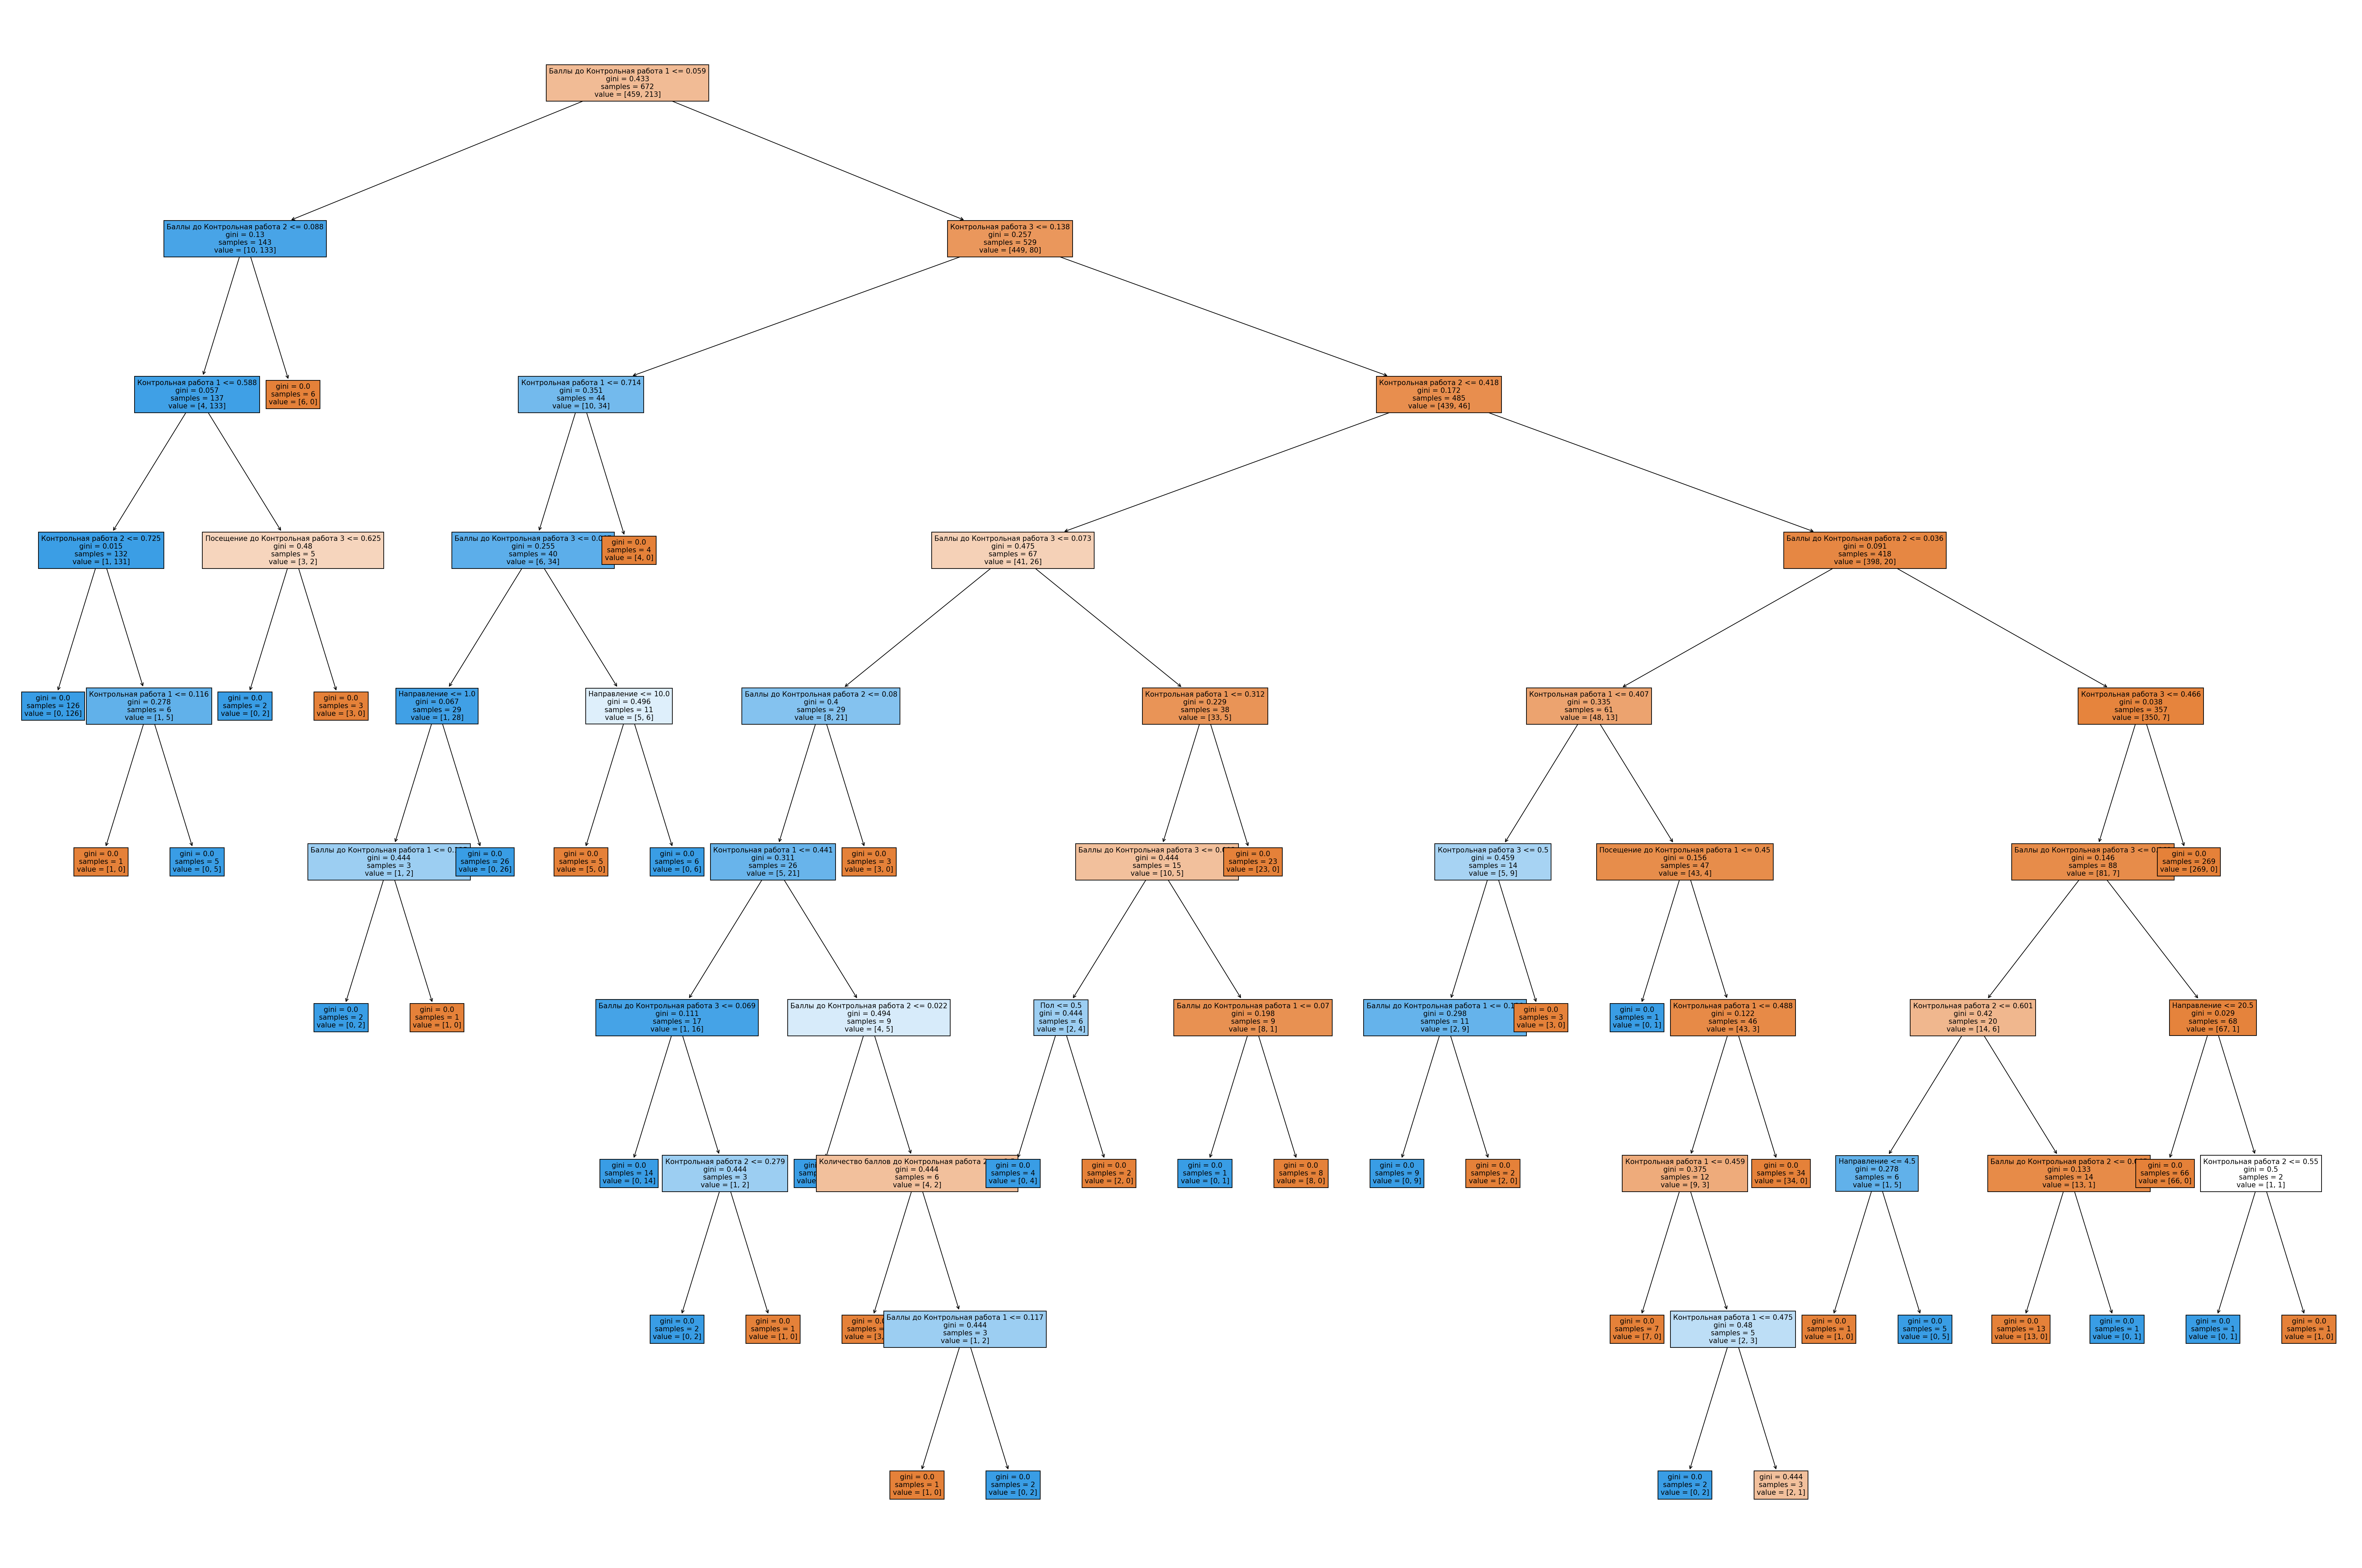

In [22]:
# дерево решений
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
X, Y = PredictionSplit.SplitTestTrainPass(data, ex, ["Оценка"]+AnalysisFunc.before)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=27)
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(60,40),dpi=150, )
    plot_tree(model,filled=True,feature_names=X.columns, fontsize=10)
    plt.show()
#pruned tree поменяй на своё
pruned_tree = DecisionTreeClassifier(max_depth=9, random_state=0)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)

**Сдача дисциплины**

In [23]:
for key, d in data_dict.items():
    print(f"Данные: {key}")
    print("Прогнозирование сдачи дисциплины")
    results = pd.DataFrame(index=list(models.keys()), columns=AnalysisFunc.exams)
    results_corr_more_01 = pd.DataFrame(index=list(models.keys()), columns=AnalysisFunc.exams)

    for ex in AnalysisFunc.exams:
        results[ex] = ""
        results_corr_more_01[ex] = ""

        X, Y = PredictionSplit.SplitTestTrainPass(d, ex, ["Пол", "Оценка"]+AnalysisFunc.before)
        pred_res = PredictionResults.PredictionModel(X, Y, models, 0.3, "recall")
        for key, val in pred_res.items():
            results[ex][key] = val

    display(results)

    print("Без направления")
    for ex in AnalysisFunc.exams:
        results[ex] = ""
        results_corr_more_01[ex] = ""

        X, Y = PredictionSplit.SplitTestTrainPass(d, ex, ["Пол", "Оценка", "Направление"]+AnalysisFunc.before)
        pred_res = PredictionResults.PredictionModel(X, Y, models, 0.3, "recall")
        for key, val in pred_res.items():
            results[ex][key] = val

    display(results)

Данные: Original
Прогнозирование сдачи дисциплины


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.519,0.532,0.582
Рандомный лес,0.646,0.734,0.785
Дерево решений,0.633,0.759,0.873
CatBoost,0.684,0.785,0.861
AdaBoostClassifier,0.709,0.797,0.873


Без направления


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.532,0.557,0.633
Рандомный лес,0.658,0.722,0.835
Дерево решений,0.608,0.747,0.861
CatBoost,0.646,0.734,0.848
AdaBoostClassifier,0.709,0.797,0.848


**Результаты контрольной**

In [24]:
for key, d in data_dict.items():
    print(f"Данные: {key}")
    print("Прогнозирование контрольных без учета оценок")
    results = pd.DataFrame(index=list(models_regres.keys()), columns=AnalysisFunc.exams)
    results_corr_more_01 = pd.DataFrame(index=list(models_regres.keys()), columns=AnalysisFunc.exams)

    for ex in AnalysisFunc.exams:
        results[ex] = ""
        results_corr_more_01[ex] = ""

        X, Y = PredictionSplit.SplitTestTrainTest(d, ex, ["Пол", "Оценка"]+AnalysisFunc.before)
        pred_res = PredictionResults.PredictionModel(X, Y, models_regres, 0.3, "mae")
        for key, val in pred_res.items():
            results[ex][key] = val *20

    display(results)

    print("Без направления")
    for ex in AnalysisFunc.exams:
        results[ex] = ""
        results_corr_more_01[ex] = ""

        X, Y = PredictionSplit.SplitTestTrainTest(d, ex, ["Пол", "Оценка", "Направление"]+AnalysisFunc.before)
        pred_res = PredictionResults.PredictionModel(X, Y, models_regres, 0.3, "mae")
        for key, val in pred_res.items():
            results[ex][key] = val *20

    display(results)

Данные: Original
Прогнозирование контрольных без учета оценок


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.42,3.5,3.9
Рандомный лес,3.46,3.18,3.58
CatBoostRegressor,3.36,3.08,3.44
AdaBoostRegressor,3.48,3.26,3.6
Ridge,3.44,3.1,3.58
LinearRegression,3.42,3.08,3.48


Без направления


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.58,3.46,3.88
Рандомный лес,3.44,3.2,3.52
CatBoostRegressor,3.44,3.12,3.44
AdaBoostRegressor,3.42,3.2,3.6
Ridge,3.46,3.12,3.58
LinearRegression,3.44,3.1,3.5


# Прогнозирование данных текущего года
Данные прошлого года считаются обучающими, а данные этого года - тестовыми

**Сдача дисциплины**

In [27]:
print("Сравнение на реальных данных")
for key, d in data_dict.items():
    print(f"Данные: {key}")
    print("Прогнозирование сдачи дисциплины")
    results = pd.DataFrame(index=list(models.keys()), columns=AnalysisFunc.exams)

    for ex in AnalysisFunc.exams:
        X, Y, = PredictionSplit.SplitTestTrainPass(d, ex, ["Пол", "Оценка", "Направление"])
        x_, y_ = PredictionSplit.SplitTestTrainPass(dataReal, ex, ["Пол", "Оценка", "Направление"])
        results[ex] = ""
        pred_res_matrix = PredictionResults.PredictionModelMatrixNew(X, Y, x_, y_, models)
        pred_res = PredictionResults.PredictionModelNew(X, Y, x_, y_, models, "recall")

        for key, val in pred_res.items():
            results[ex][key] = str(pred_res[key]) + "    " + str(pred_res_matrix[key])

    display(results)

    print("Без учета процента набранных баллов:")
    for ex in AnalysisFunc.exams:
        X, Y, = PredictionSplit.SplitTestTrainPass(d, ex, ["Пол", "Оценка", "Направление"]+AnalysisFunc.before)
        x_, y_ = PredictionSplit.SplitTestTrainPass(dataReal, ex, ["Пол", "Оценка", "Направление"]+AnalysisFunc.before)
        results[ex] = ""
        pred_res_matrix = PredictionResults.PredictionModelMatrixNew(X, Y, x_, y_, models)
        pred_res = PredictionResults.PredictionModelNew(X, Y, x_, y_, models, "recall")

        for key, val in pred_res.items():
            results[ex][key] = str(pred_res[key]) + "    " + str(pred_res_matrix[key])

    display(results)


Сравнение на реальных данных
Данные: Original
Прогнозирование сдачи дисциплины


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.712 [[618 51]\n [ 84 208]],0.76 [[582 87]\n [ 70 222]],0.764 [[599 70]\n [ 69 223]]
Рандомный лес,0.733 [[623 46]\n [ 76 216]],0.788 [[646 23]\n [ 66 226]],0.846 [[617 52]\n [ 42 250]]
Дерево решений,0.76 [[596 73]\n [ 70 222]],0.74 [[632 37]\n [ 76 216]],0.822 [[584 85]\n [ 52 240]]
CatBoost,0.712 [[629 40]\n [ 84 208]],0.822 [[646 23]\n [ 52 240]],0.877 [[632 37]\n [ 36 256]]
AdaBoostClassifier,0.798 [[586 83]\n [ 59 233]],0.808 [[614 55]\n [ 56 236]],0.856 [[630 39]\n [ 42 250]]


Без учета процента набранных баллов:


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,0.736 [[604 65]\n [ 77 215]],0.757 [[577 92]\n [ 71 221]],0.774 [[598 71]\n [ 66 226]]
Рандомный лес,0.812 [[601 68]\n [ 58 234]],0.836 [[616 53]\n [ 50 242]],0.884 [[615 54]\n [ 36 256]]
Дерево решений,0.747 [[594 75]\n [ 74 218]],0.87 [[582 87]\n [ 38 254]],0.863 [[597 72]\n [ 40 252]]
CatBoost,0.784 [[595 74]\n [ 63 229]],0.853 [[616 53]\n [ 43 249]],0.884 [[628 41]\n [ 34 258]]
AdaBoostClassifier,0.836 [[557 112]\n [ 48 244]],0.846 [[595 74]\n [ 45 247]],0.904 [[599 70]\n [ 28 264]]


**Результаты контрольной**

In [40]:
print("Сравнение на реальных данных")

for key, d in data_dict.items():
    print(f"Данные: {key}")
    print("Прогнозирование контрольных без процентов")
    results = pd.DataFrame(index=list(models_regres.keys()), columns=AnalysisFunc.exams)

    for ex in AnalysisFunc.exams:
        results[ex] = ""
        X, Y, = PredictionSplit.SplitTestTrainTest(d, ex, [ "Оценка", "Направление"]+AnalysisFunc.before)
        x_, y_ = PredictionSplit.SplitTestTrainTest(dataReal, ex, ["Оценка", "Направление"]+AnalysisFunc.before)
        pred_res = PredictionResults.PredictionModelNew(X, Y, x_, y_, models_regres, "mae")
        for key, val in pred_res.items():
            results[ex][key] = f"{round(val * 20, 2)}"#100

    display(results)

Сравнение на реальных данных
Данные: Original
Прогнозирование контрольных без процентов


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.52,3.36,3.78
Рандомный лес,3.52,3.04,3.68
CatBoostRegressor,3.44,3.0,3.48
AdaBoostRegressor,3.52,3.1,3.7
Ridge,3.44,3.02,3.48
LinearRegression,3.44,3.02,3.48


In [39]:
# прогнозирование и просмотр максимальной ошибки
for key_data, d in data_dict.items():
    print(f"Данные: {key_data}")
    results = pd.DataFrame(index=list(models_regres.keys()), columns=AnalysisFunc.exams)

    for ex in AnalysisFunc.exams:
        results[ex] = ""
        X, Y, = PredictionSplit.SplitTestTrainTest(d, ex, [ "Оценка", "Направление"]+AnalysisFunc.before)
        x_, y_ = PredictionSplit.SplitTestTrainTest(dataReal, ex, ["Оценка", "Направление"]+AnalysisFunc.before)

        pred_res = {}
        for key, model in models_regres.items():
            model.fit(X, Y)
            data_prediction = model.predict(x_)
            data_prediction[data_prediction < 0] = 0

            res = pd.DataFrame()

            res[ex] = y_.round(2)* 20
            res['Прогнозированная контрольная'] = data_prediction.round(2)* 20
            res['Разница прогноза'] = res[ex] - res['Прогнозированная контрольная']
            mae = round(PredictionResults.accuracy_dict["mae"](y_.round(2), data_prediction.round(2))* 20, 3)
            pred_res[key] = f"{mae} / max={round(res['Разница прогноза'].abs().max(), 0)}"

        for key, val in pred_res.items():
            results[ex][key] = val

    display(results)

Данные: Original


,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3
k-ближайших соседей,3.534 / max=14.0,3.366 / max=16.0,3.779 / max=16.0
Рандомный лес,3.515 / max=14.0,3.086 / max=16.0,3.642 / max=15.0
CatBoostRegressor,3.446 / max=15.0,3.009 / max=16.0,3.488 / max=15.0
AdaBoostRegressor,3.533 / max=14.0,3.159 / max=16.0,3.614 / max=15.0
Ridge,3.447 / max=15.0,3.011 / max=18.0,3.473 / max=16.0
LinearRegression,3.437 / max=15.0,3.014 / max=19.0,3.474 / max=16.0


**Результаты контрольной**

Сохранение прогнозов в XLSX-файл

In [ ]:
# прогнозирование контрольных и соханение результатов
for key_data, d in data_dict.items():
    print(f"Данные: {key_data}")
    for ex in AnalysisFunc.exams:
        X, Y, = PredictionSplit.SplitTestTrainTest(d, ex, [ "Оценка"]+AnalysisFunc.before)
        x_, y_ = PredictionSplit.SplitTestTrainTest(dataReal, ex, ["Оценка"]+AnalysisFunc.before)
        results = pd.DataFrame(columns=["Real "+ex]+list(models_regres.keys()))
        results["Real "+ex] = dataReal[ex].round(2)* 20
        for key, model in models_regres.items():
            model.fit(X, Y)
            data_prediction = model.predict(x_)
            data_prediction[data_prediction < 0] = 0
            results[key] = data_prediction.round(2)* 20
            mae = round(PredictionResults.accuracy_dict["mae"](y_.round(2), data_prediction.round(2)), 3)* 20
            print(f"{key}: спрогнозировано; mae = {mae}")

        BaseFuncs.SaveFileCSV(path = f"/content/drive/My Drive/Учёба/8 семестр/диплом/Проект/VKR/Учет контрольных/",
            filename = f"ПиОА {key_data} ({ex}) DIV20", results = results, csv = False)

        display(results)